In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
p = {}

p["n_syn"]     = 100
p["g_factor"]  = 100
p["cycle_dur"] = 100 # sec

p["g_S"]       = 0.0
p["alpha"]     = -55.0
p["beta"]      = 0.25
p["r_max"]     = 0.35

In [7]:
def get_default(params):
    import json
    return json.load(open('./default/default_{0}.json'.format(params), 'r'))

In [8]:
n_syn = p["n_syn"]

# eta, epsは上がいているのでtau_deltaのみデフォルトを使用
learn = get_default("learn")
learn["eps"] = 1e-1 / n_syn
learn["eta"] = 1e-3 / n_syn

# alpha, beta, r_max, g_Sを上書き
neuron = get_default("neuron")
neuron["phi"]["alpha"] = p["alpha"]
neuron["phi"]["beta"]  = p["beta"]
neuron["phi"]["r_max"] = p["r_max"]
neuron["g_S"]          = p["g_S"]

In [15]:
epochs    = 4 # 学習epoch数
l_c       = 6 # 1epoch中の学習するsinの回数
eval_c    = 2 # 1epoch中の評価時のsinの回数
cycles    = epochs * l_c + (epochs + 1) * eval_c # 34 (一番最初に評価期間を持ってきている)
cycle_dur = p["cycle_dur"] # 100 (1個のサイン波を何msecで表現するか)
t_end     = cycles * cycle_dur # 3400 # トータルの学習時間ms

In [59]:
def exc_soma_cond(t):
    if t % (cycle_dur * (l_c + eval_c)) < cycle_dur * eval_c:
        # 評価期間は値を0        
        return 0.0
    else:
        # 1.0を中心に振動するサイン波
        return ((1 + np.sin(np.pi / 2 + t / t_end * cycles * 2 * np.pi)) \
                * 2e-3 * 1 + 8e-3) * p["g_factor"]

def inh_soma_cond(t):
    if t % (cycle_dur * (l_c + eval_c)) < cycle_dur * eval_c:
        # 評価期間は値を0に
        return 0.0
    else:
        return 8e-2 * p["g_factor"]

dt  = 0.05
f_r = 0.01  # 10Hz
t_pts = np.arange(0, t_end / cycles, dt) # 0.0~100.0 を 0.05間隔で

# 0~1の乱数を2000個発生させて、0.0005 未満だった時刻(0.0~100.0)を記録
# 例えば、[50.5 , 74.65] など
# そこからcycle_dur=100の時刻毎に[50.5, 150.5, 250.5 ...]と、[74.65, 174.65, 274.65 ...]をまぜてソートしたものが
# 各ニューロンの発火時刻になる

poisson_spikes = [t_pts[np.random.rand(t_pts.shape[0]) < f_r * dt] for _ in range(n_syn)]
poisson_spikes = [[] if spikes.shape[0] == 0 else np.concatenate(
    [np.arange(spike, t_end, cycle_dur) for spike in spikes]) for spikes in poisson_spikes]
# [100]
# 100個あるニューロンの発火時刻列

In [87]:
spikes = [50.5 , 74.65]
out = np.concatenate([np.arange(spike, t_end, cycle_dur) for spike in spikes])
out

array([  50.5 ,  150.5 ,  250.5 ,  350.5 ,  450.5 ,  550.5 ,  650.5 ,
        750.5 ,  850.5 ,  950.5 , 1050.5 , 1150.5 , 1250.5 , 1350.5 ,
       1450.5 , 1550.5 , 1650.5 , 1750.5 , 1850.5 , 1950.5 , 2050.5 ,
       2150.5 , 2250.5 , 2350.5 , 2450.5 , 2550.5 , 2650.5 , 2750.5 ,
       2850.5 , 2950.5 , 3050.5 , 3150.5 , 3250.5 , 3350.5 ,   74.65,
        174.65,  274.65,  374.65,  474.65,  574.65,  674.65,  774.65,
        874.65,  974.65, 1074.65, 1174.65, 1274.65, 1374.65, 1474.65,
       1574.65, 1674.65, 1774.65, 1874.65, 1974.65, 2074.65, 2174.65,
       2274.65, 2374.65, 2474.65, 2574.65, 2674.65, 2774.65, 2874.65,
       2974.65, 3074.65, 3174.65, 3274.65, 3374.65])

In [88]:
def exc_soma_cond(t):
    cycle_dur = 100
    l_c       = 6
    eval_c    = 2
    g_factor  = 100
    t_end     = 3400
    
    if t % (cycle_dur * (l_c + eval_c)) < cycle_dur * eval_c:
        return 0.0
    else:
        return ((1 + np.sin(np.pi / 2 + t / t_end * cycles * 2 * np.pi)) \
                * 2e-3 * 1 + 8e-3) * g_factor

def inh_soma_cond(t):
    cycle_dur = 100
    l_c       = 6
    eval_c    = 2
    g_factor  = 100
    w
    if t % (cycle_dur * (l_c + eval_c)) < cycle_dur * eval_c:
        return 0.0
    else:
        return 8e-2 * g_factor

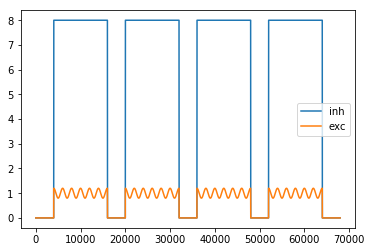

In [102]:
ts = np.arange(0, t_end, dt)
exc_s = [exc_soma_cond(t) for t in ts]
inh_s = [inh_soma_cond(t) for t in ts]

plt.plot(inh_s, label="inh")
plt.plot(exc_s, label="exc")
plt.legend()
plt.show()